# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [1]:
import tensorflow as tf
print(tf.__version__)

2.13.0


In [2]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

## Creating data to view and fit

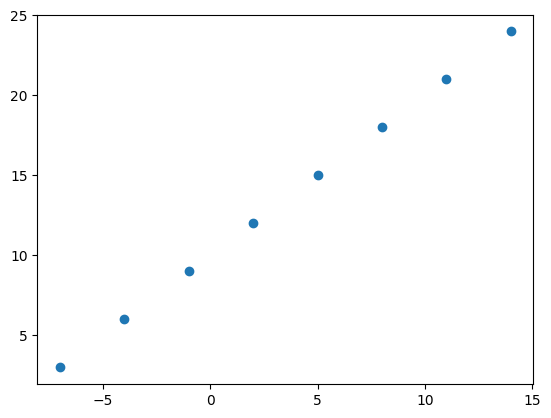

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)

In [4]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [5]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700])>)

In [6]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [7]:
# Turn our numpy array to tensors
X = tf.constant(X, dtype=tf.float32)
y = tf.constant(y, dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

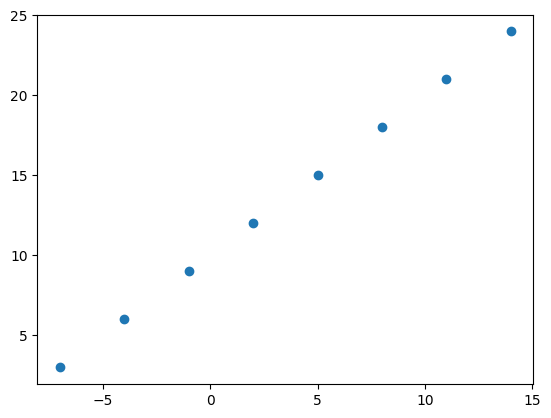

In [8]:
plt.scatter(X, y)

## Steps in modelling with TensorFlow
1. Creating a model - define the input and output layers, as well as the hidden layers of a deep learning model.
2. Compiling a model - define the loss function (in other words, the function with tells our model how wrong it is) and the optimizer (tell our model to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. Fitting a model - letting the model try to find patterns between X & y (features and labels).

In [9]:
X.shape, X.ndim

(TensorShape([8]), 1)

In [10]:
X = tf.expand_dims(X, axis=-1)

In [11]:
X.ndim, X.shape

(2, TensorShape([8, 1]))

In [12]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"])

# 3. Fit the model
model.fit(X, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 332ms/step - loss: 17.6482 - mae: 17.6482
Epoch 2/5
1/1 [==============================] - 0s 3ms/step - loss: 17.3670 - mae: 17.3670
Epoch 3/5
1/1 [==============================] - 0s 3ms/step - loss: 17.0857 - mae: 17.0857
Epoch 4/5
1/1 [==============================] - 0s 4ms/step - loss: 16.8045 - mae: 16.8045
Epoch 5/5
1/1 [==============================] - 0s 4ms/step - loss: 16.5232 - mae: 16.5232


In [13]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [14]:
# Try and make a prediction using our model
model.predict([17.0])

1/1 [==============================] - 0s 89ms/step


array([[-11.360989]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2.  **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization of the optimization function.
3.  **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more example to learn from).

In [15]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 215ms/step - loss: 13.5247 - mae: 13.5247
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 13.3922 - mae: 13.3922
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 13.2597 - mae: 13.2597
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 13.1272 - mae: 13.1272
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 12.9947 - mae: 12.9947
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 12.8622 - mae: 12.8622
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 12.7297 - mae: 12.7297
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 12.5972 - mae: 12.5972
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 12.4647 - mae: 12.4647
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 12.3322 - mae: 12.3322
Epoch 11/100
1/1 [==============================] - 0s 3m

In [16]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [17]:
# Let's see if our model's prediction has improved...
model.predict([17.0])

1/1 [==============================] - 0s 61ms/step


array([[29.90756]], dtype=float32)

In [18]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 402ms/step - loss: 13.9591 - mae: 13.9591
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 13.2719 - mae: 13.2719
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 12.5928 - mae: 12.5928
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 11.9190 - mae: 11.9190
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 11.2491 - mae: 11.2491
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 10.5815 - mae: 10.5815
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 9.9141 - mae: 9.9141
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 9.2441 - mae: 9.2441
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 8.5683 - mae: 8.5683
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 7.8835 - mae: 7.8835
Epoch 11/100
1/1 [==============================] - 0s 4ms/step -

In [19]:
model.predict([17.0])

1/1 [==============================] - 0s 52ms/step


array([[26.814146]], dtype=float32)

## Evaluating a model

In practice, a typical workflow you'll go through when building neural networks is:
```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...
```

When it comes to evaluation... there are 3 words you should memorize:
> "Visualize, visualize, visualize"
It's a good idea to visualize:
* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of model line up against the ground truth (the original labels)?

In [20]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])>

In [21]:
# Make labels for dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

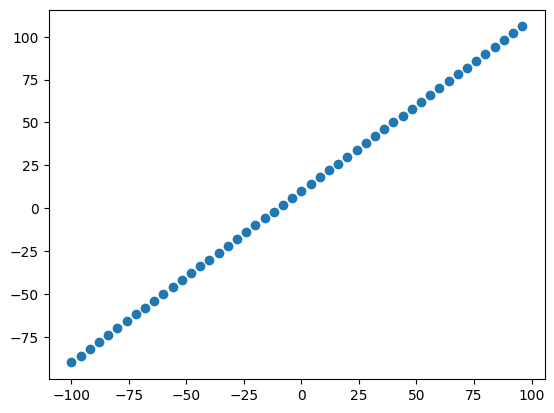

In [22]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X, y)

### The 3 sets...

  * Training set - the model learns from this data, which is typically 70-80% of the total data you have available.
  * Validation set - the model get tuned on this data, which is typically 10-15% of the data available.
  * Test set - the model gets evaluated on this data to test what is has learned, this set is typically 10-15% of the total data available.

In [23]:
# Check teh length of how many sample we have
len(X)

50

In [24]:
# Split the data into train and test sets
X_train = X[:40] # first 40 are training samples (80& of the data)
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data

Now we've got our data in training test sets... let's visualize it again!

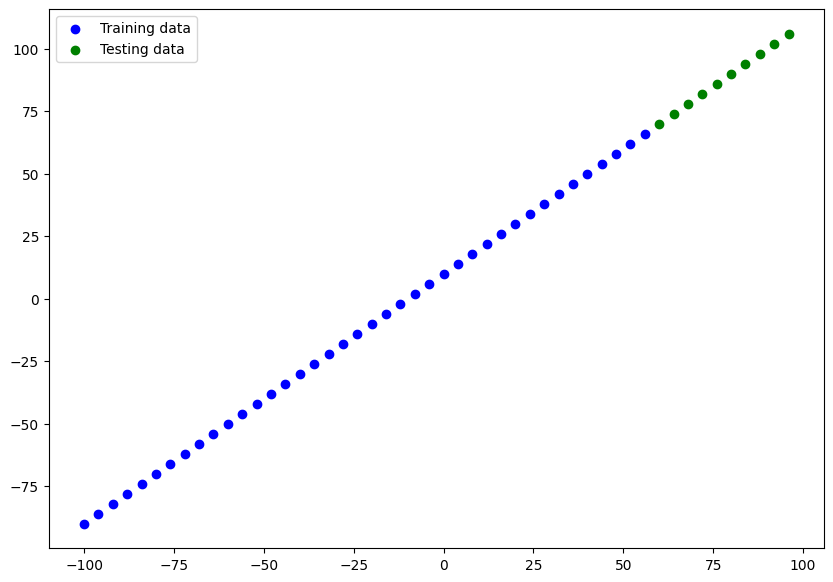

In [25]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
# Plot the test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")
plt.legend()

In [26]:
# Let's have a look at how to build a neural network for our data

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
# model.fit(X_train, y_train, epochs=100)

### Visualizing the model

In [27]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [28]:
# Let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# 1. Create the model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1]),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [29]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable parameters - these are the parameters (patterns) the model can update as it trains.
* Non-trainable params - these parameters aren't updated during training (this is typical when you bring in already learn patterns or parameters from other models during **transfer learning**).

In [30]:
model.fit(X_train, y_train ,epochs=100, verbose=0)

In [31]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
from  tensorflow.keras.utils import plot_model
plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


### Visualize our model's predictions

To visualize predictions, it's a good idea to plot them against ground truth labels.

Often you'll see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus your model predictions)

In [33]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 44ms/step


array([[ 76.491905],
       [ 81.476654],
       [ 86.4614  ],
       [ 91.44615 ],
       [ 96.4309  ],
       [101.41566 ],
       [106.400406],
       [111.385155],
       [116.3699  ],
       [121.35467 ]], dtype=float32)

In [34]:
# Let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
    """
    Plots training data, test data and compares predictions to ground truth labels.
    """

    plt.figure(figsize=(10, 7))
    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", label="Training data")
    # Plot the test data in green
    plt.scatter(test_data, test_labels, c="g", label="Testing data")
    # Plot models predictions in red
    plt.scatter(test_data, predictions, c="r", label="Predictions")
    # Show the legend
    plt.legend();

In [35]:
# X_test = tf.expand_dims(X_test, axis=-1)

In [36]:
X_test.shape, y_pred.shape

(TensorShape([10]), (10, 1))

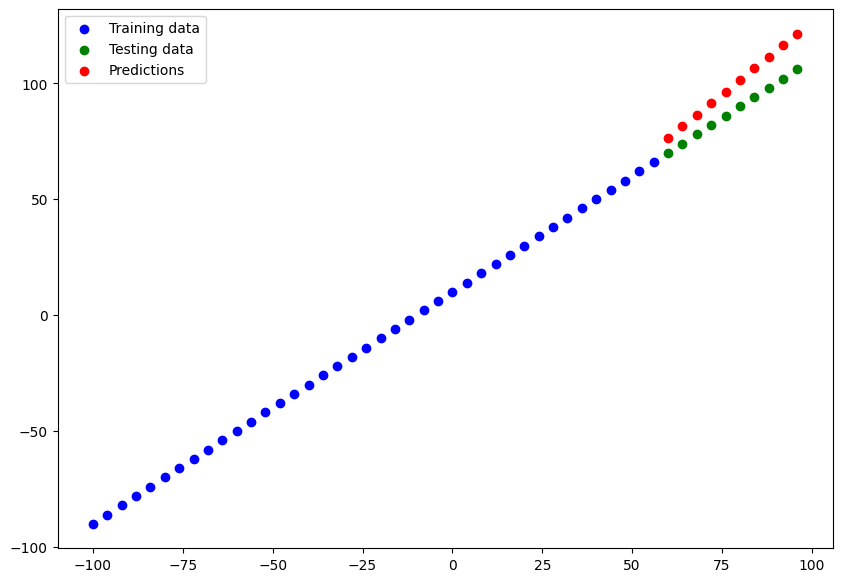

In [37]:
plot_predictions()

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression problem, two of the main metrics:
* MAE - mean absolute error, "on average, how wrong is each of my model's predictions"
* MSE - mean square error, "square the average errors"

In [39]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 106ms/step - loss: 10.9233 - mae: 10.9233


[10.923279762268066, 10.923279762268066]

In [43]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_test, y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([13.304857, 11.009338, 10.      , 10.28923 , 11.77236 , 14.449394,
       18.400406, 23.385155, 28.369904, 33.354668], dtype=float32)>

In [40]:
y_pred

array([[ 76.491905],
       [ 81.476654],
       [ 86.4614  ],
       [ 91.44615 ],
       [ 96.4309  ],
       [101.41566 ],
       [106.400406],
       [111.385155],
       [116.3699  ],
       [121.35467 ]], dtype=float32)

In [41]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

In [44]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 76.491905,  81.476654,  86.4614  ,  91.44615 ,  96.4309  ,
       101.41566 , 106.400406, 111.385155, 116.3699  , 121.35467 ],
      dtype=float32)>

In [45]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=10.923281>

In [46]:
# Calculate the mean square error
mse = tf.metrics.mean_squared_error(y_test,
                                    tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=127.31836>

In [54]:
# Make some function to use MAE and MSE
def mae(y_true, y_pred):
    return tf.metrics.mean_absolute_error(y_true, tf.squeeze(y_pred))

def mse(y_true, y_pred):
    return tf.metrics.mean_squared_error(y_true, tf.squeeze(y_pred))

### Running experiment to improve our model

```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it ...
```
1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).
2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - give your model more of a chance to find patterns in the data.

Let's do 3 modelling experiments:
1. `model_1` - same as the original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs

**Build model_1**

In [50]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 64.9116 - mae: 64.9116
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 29.9092 - mae: 29.9092
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 10.3171 - mae: 10.3171
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 12.7244 - mae: 12.7244
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 11.7696 - mae: 11.7696
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 10.8854 - mae: 10.8854
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 8.7297 - mae: 8.7297
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 7.7502 - mae: 7.7502
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 20.0092 - mae: 20.0092
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 13.7099 - mae: 13.7099
Epoch 11/100
2/2 [==============================] - 0s 3ms/step

1/1 [==============================] - 0s 24ms/step


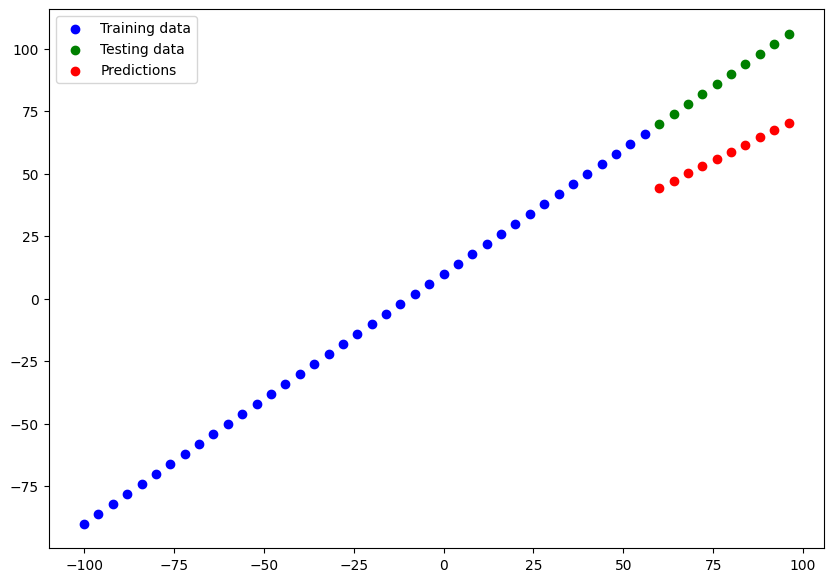

In [52]:
# Make and plot prediction for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [56]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=30.64619>,
 <tf.Tensor: shape=(), dtype=float32, numpy=949.6203>)

**Build `model_2`**
* 2 dense layers, trained for 100 epochs

In [64]:
# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 5ms/step - loss: 40.4421 - mae: 40.4421
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 31.0091 - mae: 31.0091
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 35.1974 - mae: 35.1974
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 31.4656 - mae: 31.4656
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 15.9670 - mae: 15.9670
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 12.6460 - mae: 12.6460
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 11.8959 - mae: 11.8959
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 12.9418 - mae: 12.9418
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 34.0781 - mae: 34.0781
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 23.5235 - mae: 23.5235
Epoch 11/100
2/2 [==============================] - 0s 4ms/

1/1 [==============================] - 0s 39ms/step


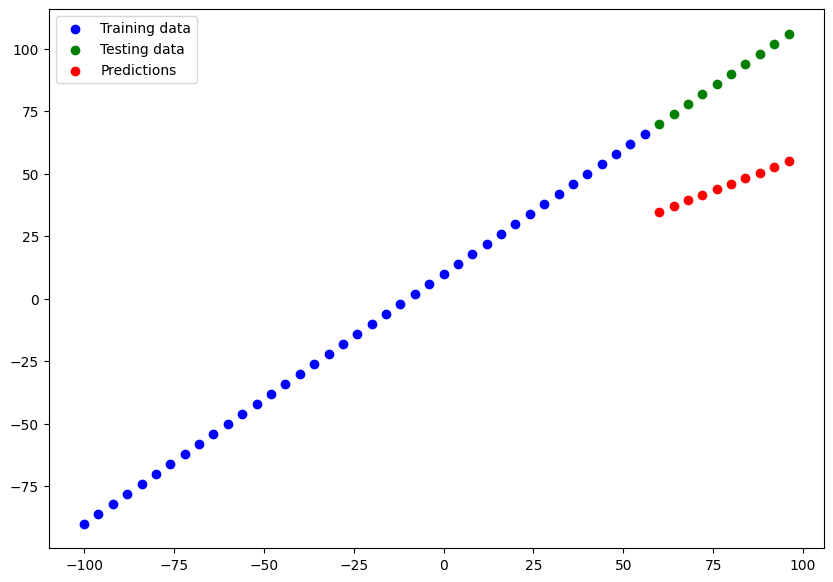

In [65]:
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [59]:
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=12.757291>,
 <tf.Tensor: shape=(), dtype=float32, numpy=163.00664>)

**Build `model_3`**

* 2 layers, trained for 500 epochs

In [62]:
# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)

Epoch 1/500


2/2 [==============================] - 0s 4ms/step - loss: 50.5294 - mae: 50.5294
Epoch 2/500
2/2 [==============================] - 0s 4ms/step - loss: 36.0777 - mae: 36.0777
Epoch 3/500
2/2 [==============================] - 0s 5ms/step - loss: 39.5842 - mae: 39.5842
Epoch 4/500
2/2 [==============================] - 0s 17ms/step - loss: 29.3512 - mae: 29.3512
Epoch 5/500
2/2 [==============================] - 0s 8ms/step - loss: 15.8914 - mae: 15.8914
Epoch 6/500
2/2 [==============================] - 0s 3ms/step - loss: 12.5986 - mae: 12.5986
Epoch 7/500
2/2 [==============================] - 0s 3ms/step - loss: 11.8677 - mae: 11.8677
Epoch 8/500
2/2 [==============================] - 0s 3ms/step - loss: 12.9432 - mae: 12.9432
Epoch 9/500
2/2 [==============================] - 0s 4ms/step - loss: 34.0827 - mae: 34.0827
Epoch 10/500
2/2 [==============================] - 0s 3ms/step - loss: 23.5280 - mae: 23.5280
Epoch 11/500
2/2 [==============================] - 0s 4ms/step - loss

1/1 [==============================] - 0s 39ms/step


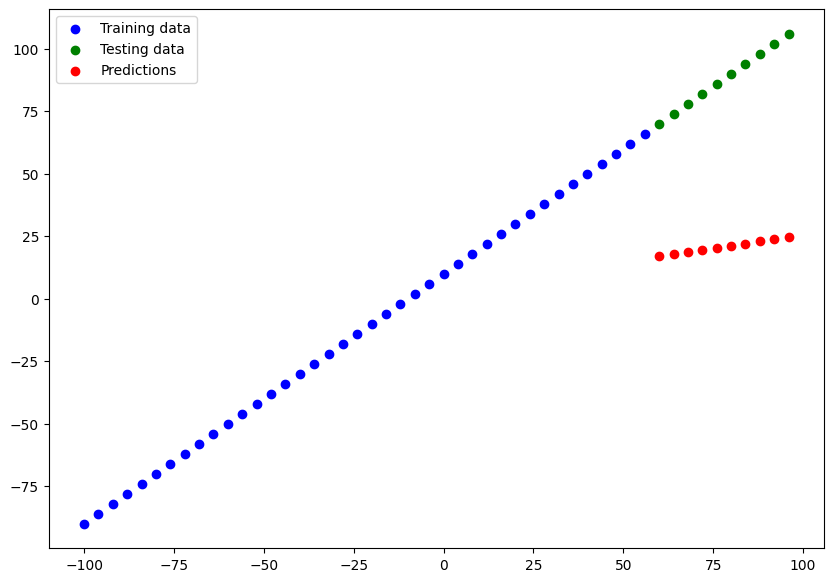

In [63]:
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [66]:
# Calculate model_3 evaluation metrics
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=67.15615>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4592.518>)

### Comparing the results of our experiments

We've run a few experiments, let's compare the results.

In [68]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,30.646191,949.620300
1,model_2,12.757291,163.006638
2,model_3,67.156151,4592.518066


## Tracking your experiments

One really good habit in machine learning modelling is to track the results of your experiments.

And when doing so, it can be tedious if you're running lots of experiments.

Luckily, there are tools to help us!

**Resource:** As you build neural model, you'll want to look into using:
* TensorBoard - a component of the TensorFlow library to help  track modeling experiments (we'll see this one later).
* Weights & Biases - a tool for tracking all of kinds of machine learning experiments (plugs straight into TensorBoard)